In [6]:
import imageio.v3 as io
img = io.imread('imageio:camera.png')


Imageio: 'camera.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/camera.png (136 kB)
Downloading: 8192/139512 bytes (5.9139512/139512 bytes (100.0%)
  Done
File saved as C:\Users\laure\AppData\Local\imageio\images\camera.png.


In [7]:
img.shape


(512, 512)

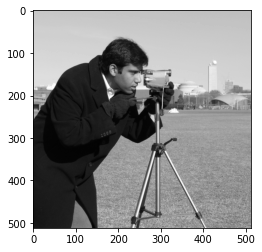

In [9]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')


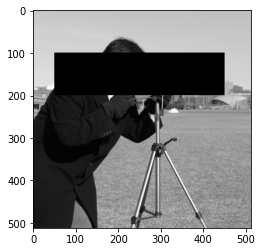

In [10]:
img[100:200, 50:450] = 0
plt.imshow(img, cmap='gray')
